## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

         X8        X9       X10       X11       X12       X13         Y  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503  


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.033215
0:	learn: 0.9883421	total: 64.3ms	remaining: 1m 4s
1:	learn: 0.9681745	total: 65.2ms	remaining: 32.5s
2:	learn: 0.9488702	total: 66.3ms	remaining: 22s
3:	learn: 0.9329564	total: 67.3ms	remaining: 16.7s
4:	learn: 0.9162164	total: 68ms	remaining: 13.5s
5:	learn: 0.9014119	total: 68.8ms	remaining: 11.4s
6:	learn: 0.8843823	total: 69.5ms	remaining: 9.86s
7:	learn: 0.8686365	total: 70.2ms	remaining: 8.7s
8:	learn: 0.8528282	total: 70.9ms	remaining: 7.8s
9:	learn: 0.8361498	total: 71.5ms	remaining: 7.08s
10:	learn: 0.8223217	total: 72.2ms	remaining: 6.49s
11:	learn: 0.8064273	total: 72.8ms	remaining: 5.99s
12:	learn: 0.7910245	total: 73.4ms	remaining: 5.58s
13:	learn: 0.7753846	total: 74.1ms	remaining: 5.22s
14:	learn: 0.7624783	total: 74.7ms	remaining: 4.91s
15:	learn: 0.7474630	total: 75.5ms	remaining: 4.64s
16:	learn: 0.7355733	total: 76.1ms	remaining: 4.4s
17:	learn: 0.7229198	total: 76.7ms	remaining: 4.18s
18:	learn: 0.7101395	total: 77.3ms	remaining: 3.99s

35:	learn: 0.5457582	total: 92ms	remaining: 2.46s
36:	learn: 0.5387132	total: 93.2ms	remaining: 2.42s
37:	learn: 0.5312761	total: 94.2ms	remaining: 2.38s
38:	learn: 0.5236193	total: 95ms	remaining: 2.34s
39:	learn: 0.5162199	total: 95.8ms	remaining: 2.3s
40:	learn: 0.5104646	total: 96.7ms	remaining: 2.26s
41:	learn: 0.5030958	total: 97.6ms	remaining: 2.23s
42:	learn: 0.4986825	total: 98.1ms	remaining: 2.18s
43:	learn: 0.4926034	total: 99ms	remaining: 2.15s
44:	learn: 0.4870782	total: 99.9ms	remaining: 2.12s
45:	learn: 0.4810994	total: 101ms	remaining: 2.09s
46:	learn: 0.4760687	total: 102ms	remaining: 2.06s
47:	learn: 0.4712482	total: 102ms	remaining: 2.03s
48:	learn: 0.4652777	total: 103ms	remaining: 2s
49:	learn: 0.4592072	total: 104ms	remaining: 1.97s
50:	learn: 0.4544515	total: 105ms	remaining: 1.95s
51:	learn: 0.4499373	total: 106ms	remaining: 1.93s
52:	learn: 0.4448387	total: 107ms	remaining: 1.91s
53:	learn: 0.4400603	total: 108ms	remaining: 1.89s
54:	learn: 0.4354120	total: 109

148:	learn: 0.2526985	total: 189ms	remaining: 1.08s
149:	learn: 0.2521684	total: 189ms	remaining: 1.07s
150:	learn: 0.2516816	total: 190ms	remaining: 1.07s
151:	learn: 0.2508937	total: 191ms	remaining: 1.06s
152:	learn: 0.2504943	total: 192ms	remaining: 1.06s
153:	learn: 0.2495332	total: 193ms	remaining: 1.06s
154:	learn: 0.2485807	total: 193ms	remaining: 1.05s
155:	learn: 0.2478762	total: 194ms	remaining: 1.05s
156:	learn: 0.2471377	total: 195ms	remaining: 1.05s
157:	learn: 0.2463434	total: 196ms	remaining: 1.04s
158:	learn: 0.2453437	total: 197ms	remaining: 1.04s
159:	learn: 0.2444988	total: 198ms	remaining: 1.04s
160:	learn: 0.2436302	total: 199ms	remaining: 1.03s
161:	learn: 0.2429577	total: 200ms	remaining: 1.03s
162:	learn: 0.2421775	total: 200ms	remaining: 1.03s
163:	learn: 0.2414503	total: 201ms	remaining: 1.03s
164:	learn: 0.2409420	total: 202ms	remaining: 1.02s
165:	learn: 0.2402507	total: 203ms	remaining: 1.02s
166:	learn: 0.2396995	total: 204ms	remaining: 1.02s
167:	learn: 

257:	learn: 0.1947684	total: 280ms	remaining: 805ms
258:	learn: 0.1941595	total: 281ms	remaining: 803ms
259:	learn: 0.1940877	total: 281ms	remaining: 801ms
260:	learn: 0.1934929	total: 282ms	remaining: 799ms
261:	learn: 0.1933274	total: 283ms	remaining: 796ms
262:	learn: 0.1931187	total: 283ms	remaining: 794ms
263:	learn: 0.1926213	total: 284ms	remaining: 792ms
264:	learn: 0.1922590	total: 285ms	remaining: 790ms
265:	learn: 0.1916753	total: 285ms	remaining: 788ms
266:	learn: 0.1914523	total: 286ms	remaining: 786ms
267:	learn: 0.1908357	total: 287ms	remaining: 783ms
268:	learn: 0.1906669	total: 287ms	remaining: 781ms
269:	learn: 0.1903640	total: 288ms	remaining: 779ms
270:	learn: 0.1901032	total: 289ms	remaining: 777ms
271:	learn: 0.1899440	total: 290ms	remaining: 776ms
272:	learn: 0.1893607	total: 291ms	remaining: 774ms
273:	learn: 0.1890796	total: 291ms	remaining: 772ms
274:	learn: 0.1885348	total: 292ms	remaining: 770ms
275:	learn: 0.1881532	total: 293ms	remaining: 768ms
276:	learn: 

385:	learn: 0.1553132	total: 375ms	remaining: 597ms
386:	learn: 0.1552335	total: 376ms	remaining: 596ms
387:	learn: 0.1549579	total: 377ms	remaining: 595ms
388:	learn: 0.1545996	total: 378ms	remaining: 594ms
389:	learn: 0.1541635	total: 379ms	remaining: 593ms
390:	learn: 0.1541022	total: 380ms	remaining: 591ms
391:	learn: 0.1540426	total: 381ms	remaining: 590ms
392:	learn: 0.1539836	total: 381ms	remaining: 589ms
393:	learn: 0.1539440	total: 382ms	remaining: 588ms
394:	learn: 0.1535514	total: 383ms	remaining: 587ms
395:	learn: 0.1531899	total: 384ms	remaining: 586ms
396:	learn: 0.1527850	total: 385ms	remaining: 584ms
397:	learn: 0.1524331	total: 386ms	remaining: 583ms
398:	learn: 0.1519390	total: 387ms	remaining: 582ms
399:	learn: 0.1515466	total: 388ms	remaining: 581ms
400:	learn: 0.1515209	total: 388ms	remaining: 580ms
401:	learn: 0.1514625	total: 389ms	remaining: 579ms
402:	learn: 0.1511231	total: 390ms	remaining: 578ms
403:	learn: 0.1509512	total: 391ms	remaining: 577ms
404:	learn: 

492:	learn: 0.1277015	total: 470ms	remaining: 483ms
493:	learn: 0.1272973	total: 471ms	remaining: 482ms
494:	learn: 0.1270215	total: 472ms	remaining: 481ms
495:	learn: 0.1268850	total: 473ms	remaining: 480ms
496:	learn: 0.1266913	total: 473ms	remaining: 479ms
497:	learn: 0.1266179	total: 474ms	remaining: 478ms
498:	learn: 0.1263159	total: 475ms	remaining: 477ms
499:	learn: 0.1261257	total: 476ms	remaining: 476ms
500:	learn: 0.1259615	total: 476ms	remaining: 475ms
501:	learn: 0.1256306	total: 477ms	remaining: 473ms
502:	learn: 0.1254523	total: 478ms	remaining: 472ms
503:	learn: 0.1252510	total: 479ms	remaining: 471ms
504:	learn: 0.1249481	total: 480ms	remaining: 470ms
505:	learn: 0.1248303	total: 480ms	remaining: 469ms
506:	learn: 0.1245553	total: 481ms	remaining: 468ms
507:	learn: 0.1244356	total: 482ms	remaining: 467ms
508:	learn: 0.1241807	total: 483ms	remaining: 466ms
509:	learn: 0.1238600	total: 484ms	remaining: 465ms
510:	learn: 0.1236866	total: 485ms	remaining: 464ms
511:	learn: 

606:	learn: 0.1056114	total: 566ms	remaining: 367ms
607:	learn: 0.1053447	total: 567ms	remaining: 366ms
608:	learn: 0.1051951	total: 568ms	remaining: 365ms
609:	learn: 0.1049708	total: 569ms	remaining: 364ms
610:	learn: 0.1048602	total: 570ms	remaining: 363ms
611:	learn: 0.1046352	total: 571ms	remaining: 362ms
612:	learn: 0.1046112	total: 571ms	remaining: 361ms
613:	learn: 0.1044675	total: 572ms	remaining: 360ms
614:	learn: 0.1043489	total: 573ms	remaining: 359ms
615:	learn: 0.1041606	total: 574ms	remaining: 358ms
616:	learn: 0.1040179	total: 575ms	remaining: 357ms
617:	learn: 0.1037621	total: 576ms	remaining: 356ms
618:	learn: 0.1034540	total: 576ms	remaining: 355ms
619:	learn: 0.1032796	total: 577ms	remaining: 354ms
620:	learn: 0.1030680	total: 578ms	remaining: 353ms
621:	learn: 0.1028065	total: 579ms	remaining: 352ms
622:	learn: 0.1026972	total: 580ms	remaining: 351ms
623:	learn: 0.1025730	total: 580ms	remaining: 350ms
624:	learn: 0.1022834	total: 581ms	remaining: 349ms
625:	learn: 

724:	learn: 0.0894012	total: 660ms	remaining: 250ms
725:	learn: 0.0893410	total: 661ms	remaining: 250ms
726:	learn: 0.0892496	total: 662ms	remaining: 248ms
727:	learn: 0.0892373	total: 662ms	remaining: 247ms
728:	learn: 0.0890459	total: 663ms	remaining: 246ms
729:	learn: 0.0889696	total: 664ms	remaining: 245ms
730:	learn: 0.0887522	total: 664ms	remaining: 244ms
731:	learn: 0.0886018	total: 665ms	remaining: 244ms
732:	learn: 0.0883811	total: 666ms	remaining: 243ms
733:	learn: 0.0882844	total: 666ms	remaining: 242ms
734:	learn: 0.0882739	total: 667ms	remaining: 241ms
735:	learn: 0.0882535	total: 668ms	remaining: 240ms
736:	learn: 0.0881337	total: 668ms	remaining: 239ms
737:	learn: 0.0879625	total: 669ms	remaining: 238ms
738:	learn: 0.0879332	total: 670ms	remaining: 237ms
739:	learn: 0.0877825	total: 670ms	remaining: 236ms
740:	learn: 0.0875783	total: 671ms	remaining: 235ms
741:	learn: 0.0874158	total: 672ms	remaining: 234ms
742:	learn: 0.0872549	total: 672ms	remaining: 233ms
743:	learn: 

841:	learn: 0.0765602	total: 756ms	remaining: 142ms
842:	learn: 0.0764422	total: 757ms	remaining: 141ms
843:	learn: 0.0764166	total: 758ms	remaining: 140ms
844:	learn: 0.0762615	total: 759ms	remaining: 139ms
845:	learn: 0.0761596	total: 760ms	remaining: 138ms
846:	learn: 0.0760188	total: 761ms	remaining: 137ms
847:	learn: 0.0758914	total: 761ms	remaining: 136ms
848:	learn: 0.0757746	total: 762ms	remaining: 136ms
849:	learn: 0.0756534	total: 763ms	remaining: 135ms
850:	learn: 0.0755506	total: 764ms	remaining: 134ms
851:	learn: 0.0755215	total: 765ms	remaining: 133ms
852:	learn: 0.0754770	total: 766ms	remaining: 132ms
853:	learn: 0.0753510	total: 767ms	remaining: 131ms
854:	learn: 0.0753390	total: 768ms	remaining: 130ms
855:	learn: 0.0752718	total: 769ms	remaining: 129ms
856:	learn: 0.0751395	total: 770ms	remaining: 128ms
857:	learn: 0.0750599	total: 770ms	remaining: 128ms
858:	learn: 0.0748877	total: 771ms	remaining: 127ms
859:	learn: 0.0747622	total: 772ms	remaining: 126ms
860:	learn: 

952:	learn: 0.0667319	total: 850ms	remaining: 41.9ms
953:	learn: 0.0666201	total: 851ms	remaining: 41ms
954:	learn: 0.0665249	total: 852ms	remaining: 40.2ms
955:	learn: 0.0664771	total: 853ms	remaining: 39.3ms
956:	learn: 0.0663457	total: 854ms	remaining: 38.4ms
957:	learn: 0.0662446	total: 855ms	remaining: 37.5ms
958:	learn: 0.0661245	total: 855ms	remaining: 36.6ms
959:	learn: 0.0660763	total: 856ms	remaining: 35.7ms
960:	learn: 0.0660693	total: 857ms	remaining: 34.8ms
961:	learn: 0.0659938	total: 857ms	remaining: 33.9ms
962:	learn: 0.0659656	total: 858ms	remaining: 33ms
963:	learn: 0.0659336	total: 859ms	remaining: 32.1ms
964:	learn: 0.0658772	total: 859ms	remaining: 31.2ms
965:	learn: 0.0657666	total: 860ms	remaining: 30.3ms
966:	learn: 0.0656672	total: 861ms	remaining: 29.4ms
967:	learn: 0.0655864	total: 861ms	remaining: 28.5ms
968:	learn: 0.0655231	total: 862ms	remaining: 27.6ms
969:	learn: 0.0654738	total: 863ms	remaining: 26.7ms
970:	learn: 0.0653828	total: 863ms	remaining: 25.8

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

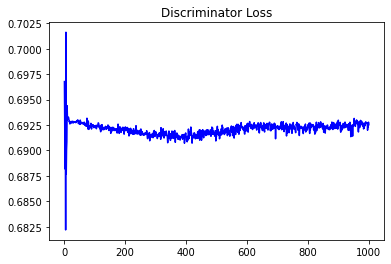

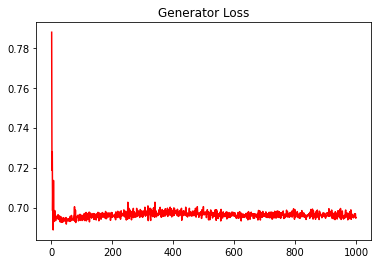

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.2888108286806916


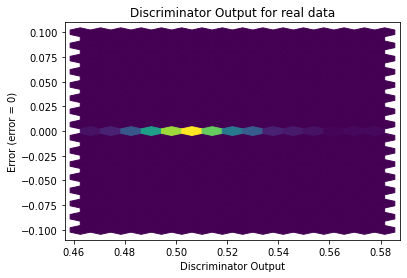

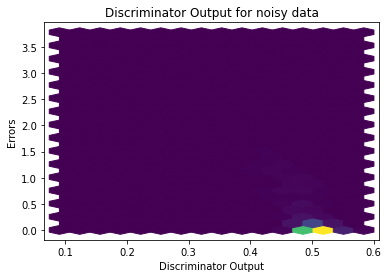

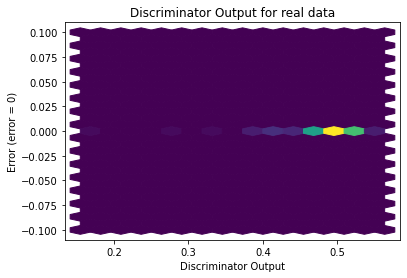

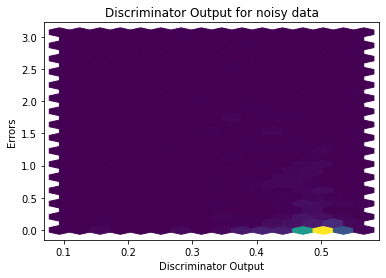

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


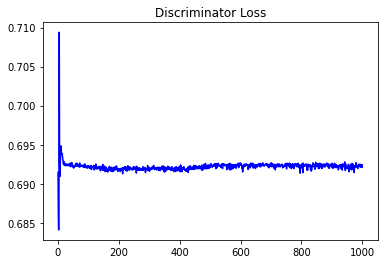

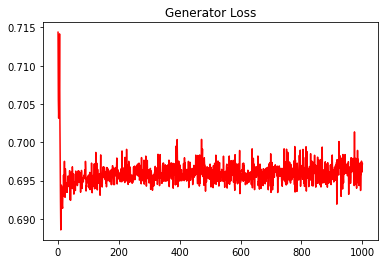

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.18560599915900652


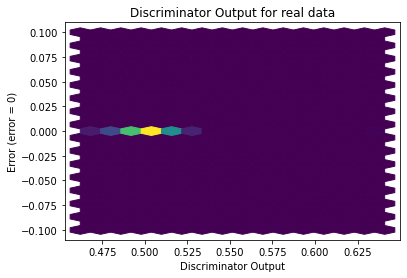

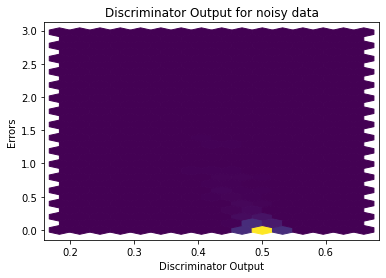

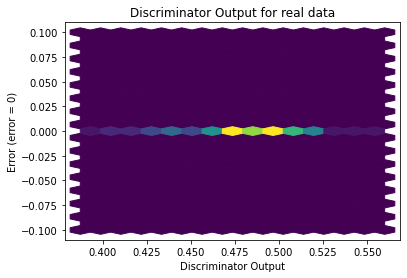

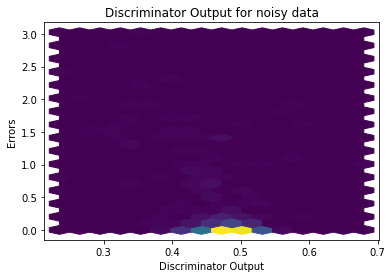

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.9899]], requires_grad=True)
